# CHAPTER 2: An Array of Sequences

# Introduction

* **Nguồn gốc từ ngôn ngữ ABC**:

  * Python thừa hưởng nhiều ý tưởng từ ABC — ngôn ngữ do Guido van Rossum từng tham gia phát triển.
  * ABC đã có: thao tác tổng quát trên sequence, kiểu tuple & mapping có sẵn, indentation để định cấu trúc, kiểu mạnh nhưng không cần khai báo biến,…

* **Ý tưởng “train” trong ABC**:

  * Gộp các kiểu như text, list, table lại thành “train” vì chúng chia sẻ thao tác chung.
  * Python kế thừa điều này: **xử lý thống nhất với các kiểu dữ liệu dạng sequence**.

* **Sequence trong Python**:

  * Bao gồm: `str`, `list`, `tuple`, `bytes`, `array`, XML element, kết quả DB,...
  * Tất cả hỗ trợ các thao tác chung như: **lặp (iteration), cắt (slicing), nối (concatenation), sắp xếp (sorting)**,...

* **Lợi ích của hiểu đúng sequence**:

  * **Tránh viết lại cái đã có** ("don’t reinvent the wheel").
  * **Thiết kế API tốt hơn**: tương thích và mở rộng cho các sequence hiện tại và tương lai.

* **Phạm vi chương hiện tại**:

  * Tập trung vào **các kiểu sequence có sẵn**.
  * Tạo sequence tùy chỉnh sẽ học ở **Chương 10**.
  * Riêng về `str` và `bytes` sẽ học kỹ hơn ở **Chương 4**.

# Overview of Built-In Sequences

📌 **Tổng quan về các kiểu Sequence (Built-In Sequences)**

🧺 **Phân loại theo cấu trúc**

1. **Container Sequences** – chứa tham chiếu đến đối tượng:

   * `list`, `tuple`, `collections.deque`
   * Có thể chứa nhiều kiểu dữ liệu khác nhau.

2. **Flat Sequences** – lưu giá trị trực tiếp trong bộ nhớ:

   * `str`, `bytes`, `bytearray`, `memoryview`, `array.array`
   * Chỉ chứa một kiểu dữ liệu (số, byte, ký tự), giúp tiết kiệm bộ nhớ hơn.


🔁 **Phân loại theo khả năng thay đổi (Mutability)**

1. **Mutable Sequences** – có thể thay đổi được:

   * `list`, `bytearray`, `array.array`, `collections.deque`, `memoryview`

2. **Immutable Sequences** – không thể thay đổi được:

   * `tuple`, `str`, `bytes`


📘 **Hình minh họa (UML diagram - Hình 2-1)**

* Trình bày các **interface trừu tượng** trong `collections.abc`:

  * `Container`: cung cấp `__contains__`
  * `Iterable`: cung cấp `__iter__`
  * `Sized`: cung cấp `__len__`
  * `Sequence`: kế thừa cả 3 trên, thêm: `__getitem__`, `__reversed__`, `index`, `count`
  * `MutableSequence`: mở rộng `Sequence` với khả năng sửa đổi: `__setitem__`, `__delitem__`, `insert`, `append`, `reverse`, `extend`, `pop`, `remove`, `__iadd__`

📝 **Ghi chú:** Các lớp cụ thể như `list`, `tuple` **không kế thừa trực tiếp** từ các abstract base class (ABCs) này, nhưng vẫn tuân theo "hợp đồng hành vi" của chúng.


✅ **Lời khuyên học tập**

* **Hiểu rõ container vs. flat + mutable vs. immutable** → giúp bạn **suy diễn dễ dàng** giữa các kiểu dữ liệu.
* Chương sau sẽ đi sâu vào:

  * `list comprehensions`
  * `generator expressions`

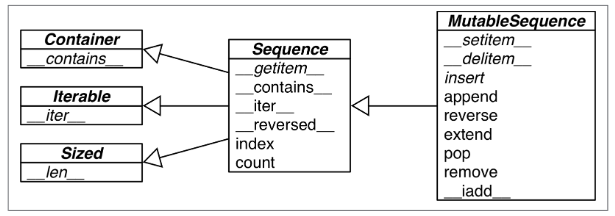

# List Comprehensions and Generator Expressions

1. **List Comprehensions & Generator Expressions**

   * Là cách nhanh để tạo một sequence.
   * List comprehension dùng cho list, generator expression dùng cho các loại sequence khác.

2. **Ưu điểm**

   * Giúp code **ngắn gọn**, **dễ đọc** hơn.
   * Thường **nhanh hơn** so với các cách viết thông thường.

3. **Thuật ngữ viết tắt**

   * *List comprehensions* → *listcomps*.
   * *Generator expressions* → *genexps*.

## List Comprehensions and Readability

1. **So sánh cách viết**

   * *Example 2-1*: Dùng vòng `for` + `append` → ai biết Python cơ bản cũng đọc được.
   * *Example 2-2*: Dùng list comprehension → ngắn gọn hơn, ý đồ “xây một list mới” rõ ràng hơn.

2. **Khi nào nên dùng list comprehension**

   * Dùng khi mục đích duy nhất là **tạo một list mới** từ dữ liệu có sẵn.
   * Không nên dùng nếu chỉ muốn lặp để tạo **tác dụng phụ** (side effects).
   * Nên giữ cú pháp ngắn gọn (≤ 2 dòng), nếu quá dài thì viết lại thành vòng `for` bình thường.

3. **Mẹo cú pháp**

   * Trong `[]`, `{}`, `()` có thể xuống dòng mà không cần ký tự `\`.

4. **Sự thay đổi giữa Python 2 và 3**

   * Python 2: biến trong `for` của list comprehension **rò rỉ ra scope bên ngoài**.
   * Python 3: mỗi list comprehension có scope riêng, biến trong đó không ghi đè biến bên ngoài.

5. **Nguyên tắc hoạt động**

   * List comprehension tạo list từ sequence hoặc iterable khác bằng cách **lọc** và **biến đổi** phần tử.
   * Có thể dùng `filter()` + `map()` để làm tương tự, nhưng kém rõ ràng hơn.

## Listcomps Versus map and filter

1. **List comprehension**

   * Làm được tất cả những gì `map()` và `filter()` làm, nhưng **ngắn gọn và dễ đọc hơn**, không cần dùng `lambda` phức tạp.

2. **Ví dụ so sánh**

   * `[ord(s) for s in symbols if ord(s) > 127]`
   * `list(filter(lambda c: c > 127, map(ord, symbols)))`
     → Kết quả giống nhau, nhưng list comprehension rõ ràng hơn.

3. **Hiệu năng**

   * Trong các ví dụ này, list comprehension **không chậm hơn** `map()` + `filter()`.

4. **Ứng dụng tiếp theo**

   * Có thể dùng list comprehension để tính **tích Descartes** (Cartesian product) từ nhiều list.

## Cartesian Products

1. **Khái niệm Cartesian product**

   * Tạo ra tất cả các **tổ hợp có thể** từ nhiều iterable.
   * Mỗi phần tử là một tuple chứa một giá trị từ mỗi iterable.
   * Số phần tử kết quả = tích số phần tử của các iterable đầu vào.

2. **List comprehension cho Cartesian product**

   * Cú pháp:

     ```python
     [(a, b) for a in list1 for b in list2]
     ```
   * Thứ tự `for` trong list comprehension quyết định **thứ tự kết quả**.

3. **Ví dụ T-shirt**

   * `(color, size) for color in colors for size in sizes` → nhóm theo **màu trước, size sau**.
   * `(color, size) for size in sizes for color in colors` → nhóm theo **size trước, màu sau**.

4. **Ứng dụng khác**

   * Dùng để tạo bộ bài: `[Card(rank, suit) for suit in suits for rank in ranks]`.

5. **Giới hạn**

   * List comprehension chỉ tạo **list** → nếu muốn tạo các kiểu sequence khác, nên dùng **generator expression**.

## Generator Expressions

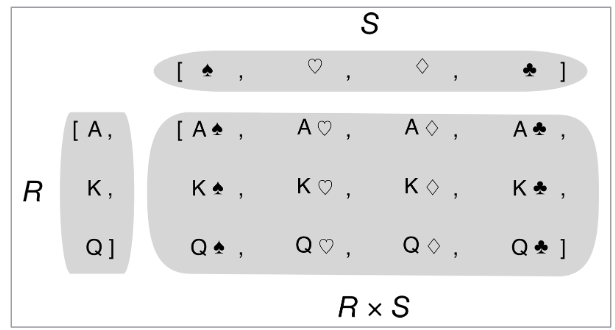

Ta có R và S, muốn có được RxS, có thể dùng kĩ thuật Cartesion Product như sau:

In [ ]:
R = ["A", "K", "Q"]
S = [1, 2, 3, 4]

RS = [(r, s) for r in R for s in S]
print(RS)

[('A', 1), ('A', 2), ('A', 3), ('A', 4), ('K', 1), ('K', 2), ('K', 3), ('K', 4), ('Q', 1), ('Q', 2), ('Q', 3), ('Q', 4)]


# Tuples Are Not Just Immutable Lists

## Tuples as Records

- Tuple lưu trữ các bản ghi: mỗi phần tử trong tuple lưu trữ dữ liệu cho một trường và vị trí của phần tử đó quyết định ý nghĩa của nó
- 

In [6]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

for country, _ in traveler_ids:
    print(country)

BRA/CE342567
ESP/XDA205856
USA/31195855
USA
BRA
ESP


## Tuple Unpacking

In [7]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates# tuple unpacking

print(latitude)
print(longitude)

33.9425
-118.408056


In [ ]:
# Using * to grab excess items
a, b, *rest = range(5)
print(a, b, rest)

0 1 [2, 3, 4]


## Nested Tuple Unpacking

Bộ để nhận một biểu thức để giải nén có thể có các bộ lồng nhau, như (a, b, (c, d)), và Python sẽ thực hiện đúng nếu biểu thức khớp với cấu trúc lồng nhau.

In [ ]:
metro_areas = [('Tokyo', 'JP', 36.933, (35.689722, 139.691667)), # Each tuple holds a record with four fields, the last of which is a coordinate pair.     
               ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),    
               ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
               ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),    
               ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),]

print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas:  # By assigning the last field to a tuple, we unpack the coordinates.
    if longitude <= 0:  # if longitude <= 0:  limits  the  output  to  metropolitan  areas  in  the  Westernhemisphere.
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


## Named Tuples

Mẹo nhớ đơn giản: Hãy tưởng tượng **mắt quét từ trái sang phải** giống như đọc sách:

```
[(a, b) for X in ... for Y in ...]
```

* **X** luôn là vòng lặp **chậm hơn** → thay đổi sau.
* **Y** luôn là vòng lặp **nhanh hơn** → thay đổi trước.

Hoặc nói vui: **"X chậm – Y nhanh"** → cứ vòng lặp nào **viết trước** thì chậm, viết sau thì nhanh.

Ví dụ:

```python
[(c, s) for color in colors for size in sizes]
```

* color: chậm → cố định trong khi size chạy hết.
* size: nhanh → chạy hết cho mỗi color.

## Tuples as Immutable Lists

* **List** trong Python: có thể thay đổi được (thêm, xóa, sửa phần tử).
* **Tuple**: giống như list ở chỗ nó chứa nhiều giá trị theo thứ tự, **nhưng một khi đã tạo ra thì không thay đổi được** — không thể thêm, xóa, hay sửa phần tử bên trong.

**"Immutable list"** ở đây nghĩa là:

* Tuple hoạt động *giống* list ở khả năng chứa nhiều item, truy cập bằng chỉ số, duyệt bằng vòng lặp, cắt lát (`slicing`)…
* Nhưng nó là **immutable** (không thay đổi được sau khi tạo).

**Khi dùng tuple thay vì list?**

1. **Bảo vệ dữ liệu** – tránh bị sửa ngoài ý muốn.
2. **Tốc độ** – tuple thường nhanh hơn list một chút khi đọc dữ liệu.
3. **Dùng làm key cho dictionary hoặc phần tử của set** – vì chúng bất biến.

Ví dụ:

```python
point = (3, 4)  # tuple
point[0] = 5    # ❌ Lỗi, vì tuple không cho phép sửa
```

| Phương thức              | Ví dụ / Cú pháp | Mô tả                                                        |
| ------------------------ | --------------- | ------------------------------------------------------------ |
| `__add__(s2)`            | `s + s2`        | Nối hai danh sách (concatenation).                           |
| `__iadd__(s2)`           | `s += s2`       | Nối tại chỗ (in-place concatenation).                        |
| `append(e)`              |                 | Thêm một phần tử vào cuối danh sách.                         |
| `clear()`                |                 | Xóa toàn bộ phần tử trong danh sách.                         |
| `__contains__(e)`        | `e in s`        | Kiểm tra phần tử có trong danh sách.                         |
| `copy()`                 |                 | Tạo bản sao nông (shallow copy) của danh sách.               |
| `count(e)`               |                 | Đếm số lần xuất hiện của phần tử.                            |
| `__delitem__(p)`         |                 | Xóa phần tử ở vị trí `p`.                                    |
| `extend(it)`             |                 | Thêm nhiều phần tử từ một iterable khác.                     |
| `__getitem__(p)`         | `s[p]`          | Lấy phần tử ở vị trí `p`.                                    |
| `__getnewargs__()`       |                 | Hỗ trợ tối ưu hóa khi tuần tự hóa với pickle.                |
| `index(e)`               |                 | Tìm vị trí xuất hiện đầu tiên của phần tử.                   |
| `insert(p, e)`           |                 | Chèn phần tử `e` vào trước vị trí `p`.                       |
| `__iter__()`             |                 | Trả về iterator để duyệt danh sách.                          |
| `__len__()`              | `len(s)`        | Trả về số phần tử trong danh sách.                           |
| `__mul__(n)`             | `s * n`         | Lặp lại danh sách `n` lần.                                   |
| `__imul__(n)`            | `s *= n`        | Lặp lại danh sách `n` lần tại chỗ (in-place).                |
| `__rmul__(n)`            | `n * s`         | Lặp lại danh sách `n` lần (nhân đảo ngược).                  |
| `pop([p])`               |                 | Xóa và trả về phần tử cuối hoặc ở vị trí `p` (nếu có).       |
| `remove(e)`              |                 | Xóa phần tử đầu tiên có giá trị bằng `e`.                    |
| `reverse()`              |                 | Đảo ngược danh sách tại chỗ.                                 |
| `__reversed__()`         |                 | Trả về iterator để duyệt từ cuối về đầu.                     |
| `__setitem__(p, e)`      | `s[p] = e`      | Gán phần tử `e` vào vị trí `p`, ghi đè giá trị cũ.           |
| `sort([key], [reverse])` |                 | Sắp xếp danh sách tại chỗ, có thể truyền `key` và `reverse`. |

# Slicing

## Why Slices and Range Exclude the Last Item

* Python (và nhiều ngôn ngữ như C) **đánh số từ 0** (zero-based indexing).
* Khi slice hoặc range, giá trị ở vị trí `stop` **không nằm trong kết quả**.

**Lợi ích của quy ước này:**

1. **Dễ biết số phần tử khi chỉ có `stop`**
   Ví dụ:

   ```python
   range(3)      # -> 0, 1, 2 (3 phần tử)
   my_list[:3]   # -> 3 phần tử đầu
   ```

   Chỉ cần nhìn `3` là biết ngay có 3 phần tử.

2. **Dễ tính độ dài khi có `start` và `stop`**
   Độ dài = `stop - start`.

   ```python
   my_list[2:5]  # length = 5 - 2 = 3
   ```

3. **Dễ chia mảng thành 2 phần không trùng**
   Nếu muốn cắt tại vị trí `x`:

   ```python
   left = my_list[:x]
   right = my_list[x:]
   ```

   Không sợ trùng hoặc thiếu phần tử nào.

## Slice Objects

Cụ thể, Python dùng **zero-based indexing** (đánh số từ 0), và khi viết `my_list[start:stop]` thì `stop` **không** được lấy vào.

Lợi ích của cách này:

1. **Dễ đếm số phần tử** nếu chỉ có `stop`:

   * `range(3)` → 3 phần tử (0, 1, 2)
   * `my_list[:3]` → 3 phần tử đầu.

2. **Dễ tính độ dài** nếu có cả `start` và `stop`:

   * Độ dài = `stop - start`.

3. **Dễ tách list thành 2 phần** mà không bị trùng:

   * `my_list[:x]` là phần trước.
   * `my_list[x:]` là phần sau.

Ví dụ:

```python
l = [10, 20, 30, 40, 50, 60]
l[:3]   # [10, 20, 30]
l[3:]   # [40, 50, 60]
```

\=> Hai list này ghép lại chính là list ban đầu, không thiếu hay trùng phần tử.

## Multidimensional Slicing and Ellipsis

* Khi cắt một đoạn `[start:end]`, số phần tử **luôn** bằng `end - start` (rất đẹp cho toán học và chứng minh).
* Hai đoạn `[a:b]` và `[b:c]` ghép lại sẽ thành `[a:c]` mà không cần chỉnh gì.
* Không phải cộng/trừ 1 khi tính chỉ số cuối (điều này hay gây lỗi “off-by-one”).

Một cách dễ nhớ: **cái số cuối là “điểm dừng” chứ không phải “điểm lấy”** — giống như cái vạch đích trong chạy bộ, chạm tới là dừng.

## Assigning to Slices

1. **Slicing as an assignment target** means you can replace multiple elements at once.

   ```python
   l[2:5] = [20, 30]
   ```

   replaces positions 2, 3, and 4 with 20 and 30.

2. **`del` with slices** removes elements in a range:

   ```python
   del l[5:7]
   ```

3. **Striding in slice assignment** lets you replace every n-th element, but you must match the lengths exactly:

   ```python
   l[3::2] = [11, 22]  # replaces positions 3 and 5
   ```

4. The right-hand side **must** be an iterable when assigning to a slice — even for a single value:

   ```python
   l[2:5] = [100]  # ✅
   l[2:5] = 100    # ❌ TypeError
   ```

# Using + and * with Sequences

**Note – `+` và `*` với sequences (list, tuple, str)**

1. **`+` (concatenation)**

   * Ghép hai sequence **cùng kiểu** → tạo ra **sequence mới** cùng kiểu.
   * Không thay đổi dữ liệu gốc.

2. **`*` (repetition)**

   * Nhân sequence với **một số nguyên** → lặp lại sequence đó → **sequence mới** được tạo.
   * Ví dụ:

     ```python
     [1, 2, 3] * 5  
     # → [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
     'abcd' * 5  
     # → 'abcdabcdabcdabcdabcd'
     ```

3. **Điểm cần cẩn thận**

   * Nếu sequence chứa **mutable items** (vd: list trong list) → `a * n` sẽ nhân **tham chiếu** chứ không nhân bản độc lập.
   * Ví dụ sai:

     ```python
     my_list = [[]] * 3  
     # 3 phần tử nhưng đều trỏ tới cùng 1 list bên trong
     ```

## Building Lists of Lists

**1. Quy tắc chung**

* `+` → Nối (concatenate) hai sequence **cùng loại** → trả về **sequence mới**.
* `*` → Lặp sequence nhiều lần (nhân với số nguyên) → trả về **sequence mới**.
* **Không** thay đổi sequence ban đầu (operands không bị chỉnh sửa).

**2. Ví dụ**

```python
l = [1, 2, 3]
l * 5
# [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

'abcd' * 5
# 'abcdabcdabcdabcdabcd'
```

**3. Cảnh báo khi dùng `*` với phần tử mutable**

* Nếu phần tử trong sequence là **mutable** (vd: list), `*` sẽ **sao chép tham chiếu**, không sao chép nội dung.
* Ví dụ:

```python
my_list = [[]] * 3
# [[ ], [ ], [ ]] nhưng cả 3 phần tử đều trỏ đến cùng một list bên trong
my_list[0].append(1)
# [[1], [1], [1]]
```

→ Dẫn đến **hành vi bất ngờ**.

# Augmented Assignment with Sequences

**1. Khi viết:**

```python
my_list = [[]] * 3
```

* Python tạo **một** list rỗng: `[]` (gọi là `list_inner`).
* Sau đó, nó tạo `my_list` gồm **3 tham chiếu** trỏ tới **cùng một** `list_inner`.

📌 Sơ đồ bộ nhớ:

```
my_list ───► [   ┌──► []
               ├──► []
               └──► []   ]
      (Cả 3 mũi tên đều trỏ tới cùng một list rỗng trong bộ nhớ)
```

**2. Khi bạn chạy:**

```python
my_list[0].append(1)
```

* `my_list[0]` chính là `list_inner`,
* Thêm `1` vào `list_inner` → tất cả các phần tử trong `my_list` cùng thay đổi,
  vì chúng **cùng trỏ tới một đối tượng**.

📌 Kết quả:

```
[[1], [1], [1]]
```

**3. Cách tránh lỗi này**
Nếu muốn 3 list **riêng biệt**:

```python
my_list = [[] for _ in range(3)]
```

→ Mỗi vòng lặp tạo **một list mới** trong bộ nhớ.

## A += Assignment PuzzlerT

**Tuples as Immutable Lists – Tiếp: Toán tử `+` và `*` trên sequence**

* **Quy ước trong Python:**
  Lập trình viên Python mong rằng mọi sequence (list, tuple, string, …) đều hỗ trợ `+` (nối) và `*` (lặp).

* **Toán tử `+` (concatenation – nối):**

  * Hai toán hạng thường phải **cùng loại sequence** (list + list, tuple + tuple, string + string).
  * **Không thay đổi** các toán hạng ban đầu → tạo ra **một sequence mới** cùng loại.

* **Toán tử `*` (repeat – lặp):**

  * Dùng để nối nhiều bản sao của cùng một sequence lại.
  * Có thể viết `sequence * int` hoặc `int * sequence`.
  * Kết quả là một **sequence mới**, các toán hạng gốc không bị thay đổi.

* **Ví dụ:**

  ```python
  l = [1, 2, 3]
  l * 5
  # → [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

  5 * 'abcd'
  # → 'abcdabcdabcdabcdabcd'
  ```

* **Cảnh báo khi dùng `*` với sequence chứa phần tử mutable (thay đổi được):**

  * `a * n` sẽ **sao chép tham chiếu** chứ không sao chép độc lập giá trị bên trong.
  * Ví dụ:

    ```python
    my_list = [[]] * 3
    # → [[], [], []] nhưng cả 3 phần tử đều trỏ tới CÙNG 1 list bên trong
    ```

    → Thay đổi một phần tử con sẽ làm tất cả các phần tử con bị thay đổi.

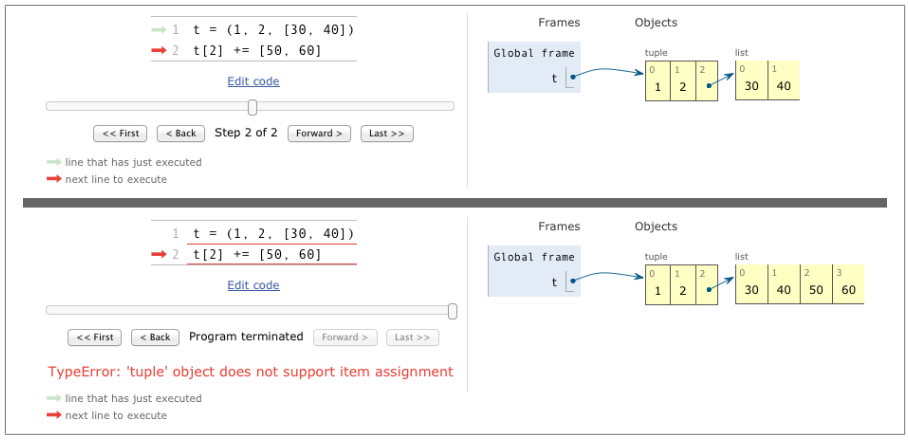

# list.sort and the sorted Built-In Function

* Sắp xếp các phần tử

In [ ]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
print(sorted(fruits))
print(sorted(fruits, reverse=True))

['apple', 'banana', 'grape', 'raspberry']
['raspberry', 'grape', 'banana', 'apple']


# Managing Ordered Sequences with bisect

## Searching with bisect

* **bisect(haystack, needle)** thực hiện tìm kiếm nhị phân

## Inserting with bisect.insort

* Việc sắp xếp rất tốn kém

In [13]:
import bisect
import random

size = 7
random.seed(1729)

my_list = []
for i in range(size):
    new_item = random.randrange(size*2)
    bisect.insort(my_list, new_item)  # Insert while maintaining order
    print(f'Inserted {new_item:2d} into {my_list}')

Inserted 10 into [10]
Inserted  0 into [0, 10]
Inserted  6 into [0, 6, 10]
Inserted  8 into [0, 6, 8, 10]
Inserted  7 into [0, 6, 7, 8, 10]
Inserted  2 into [0, 2, 6, 7, 8, 10]
Inserted 10 into [0, 2, 6, 7, 8, 10, 10]


# When a List Is Not the Answer

**"List không phải lúc nào cũng là lựa chọn tốt nhất"** và đưa ra các tình huống cụ thể.
Mình tóm ý để bạn dễ nhớ nhé:

* **List**: Linh hoạt, dễ dùng → tốt cho nhiều tình huống, nhưng không tối ưu về hiệu suất hoặc bộ nhớ trong một số trường hợp.
* **Array**: Nếu lưu hàng chục triệu số thực (floating-point), array hiệu quả hơn vì:

  * Không lưu cả object float như list.
  * Chỉ lưu các byte dạng máy → giống như mảng trong C → tiết kiệm bộ nhớ, truy cập nhanh.
* **Deque**: Nếu liên tục thêm/xóa ở **đầu** hoặc **cuối** danh sách (FIFO / LIFO) thì deque nhanh hơn list.
* **Set**: Nếu cần kiểm tra **phần tử có trong tập hợp không** (membership check) nhiều lần và dữ liệu lớn → set tối ưu hơn list.

  * Nhưng: set **không phải sequence** (không có thứ tự).

💡 Nói ngắn gọn: **List = đa dụng, nhưng không phải lúc nào cũng tối ưu** → Tùy yêu cầu, ta chọn cấu trúc dữ liệu khác để tăng hiệu suất.

## Arrays

**1. Khi nào dùng `array.array` thay vì list**

* Nếu **list của bạn chỉ chứa số** → dùng `array.array` sẽ **tiết kiệm bộ nhớ hơn** vì nó lưu dữ liệu giống như mảng C thuần.
* Vẫn hỗ trợ **các thao tác giống list** (`.pop`, `.insert`, `.extend`, …)
* Có thêm **phương thức đặc biệt** để nạp/lưu nhanh (`.frombytes`, `.tofile`).


**2. Cách hoạt động**

* Khi tạo `array`, bạn **phải chỉ định typecode** (1 ký tự cho biết kiểu dữ liệu C dùng để lưu).
* Ví dụ: `'b'` nghĩa là **signed char** (số nguyên từ -128 đến 127, mỗi số tốn đúng 1 byte).
* Python **sẽ không cho** bạn đưa vào giá trị nằm ngoài phạm vi kiểu đã chọn → giúp tiết kiệm bộ nhớ nhưng cũng ràng buộc chặt hơn.


**3. Lợi ích chính**

* **Tiết kiệm bộ nhớ** cho dãy số dài.
* **Tốc độ** xử lý cao hơn với số lượng lớn dữ liệu số.
* An toàn hơn vì giới hạn kiểu dữ liệu.

In [14]:
from array import array
from random import random

floats = array('d', (random() for i in range(10**7)))  # Create an array of 10 million random floats
print(floats[-1])  # Print the last element to verify creation

0.5963321947530882


## Memory Views

**Ý tưởng chính**
`memoryview` là một kiểu dữ liệu có sẵn trong Python cho phép bạn **truy cập và thao tác dữ liệu nhị phân trong bộ nhớ mà không cần sao chép nó**.

* Bình thường, nếu bạn cắt (slice) hoặc chuyển đổi dữ liệu từ mảng lớn, Python thường tạo ra **bản sao mới**, tốn RAM và thời gian.
* `memoryview` thì **không sao chép**, nó chỉ tạo một “cửa sổ” (view) để nhìn và thao tác trực tiếp trên cùng vùng nhớ.


**Tại sao lại cần?**

* Khi làm việc với **dữ liệu lớn** (ảnh, âm thanh, video, dữ liệu khoa học…), sao chép dữ liệu nhiều lần sẽ rất tốn kém.
* `memoryview` cho phép nhiều đối tượng (như mảng NumPy, ảnh PIL, cơ sở dữ liệu SQLite, v.v.) **dùng chung dữ liệu gốc** mà không cần nhân bản.
* Đây là lý do nó được mô tả là **"generalized NumPy array structure in Python"** — giống mảng NumPy nhưng không tích hợp sẵn toán học.


**Ví dụ dễ hình dung**
Giống như bạn có một **tấm bản đồ lớn**:

* Bình thường: Muốn lấy một phần bản đồ → bạn **photo** lại đoạn đó → tốn giấy/mực.
* Với `memoryview`: Bạn **dùng khung kính** để nhìn xuyên vào đúng chỗ bạn cần trên bản đồ → nhanh, không tốn thêm gì, và mọi người có thể nhìn cùng một bản đồ qua các khung khác nhau.


**Tính năng đặc biệt `cast`**

* `memoryview.cast()` cho phép **đọc hoặc ghi cùng dữ liệu gốc nhưng với cách diễn giải byte khác** (giống `C cast`).
* Ví dụ: cùng 8 byte dữ liệu, lúc thì bạn đọc nó như 8 số nguyên 1 byte (`B`), lúc thì như 4 số nguyên 2 byte (`H`) → mà vẫn không di chuyển dữ liệu.


## NumPy and SciPy

## Deques and Other Queues

**Ý chính:**

* **List** trong Python có `.append` và `.pop` nên bạn có thể dùng nó như **stack** (ngăn xếp) hoặc **queue** (hàng đợi).
* Nhưng nếu bạn chèn hoặc xóa **ở đầu list** (index 0), Python phải *dịch chuyển toàn bộ phần tử còn lại* → rất tốn thời gian (O(n)).
* **`collections.deque`** là một **double-ended queue** (hàng đợi hai đầu) được tối ưu cho việc thêm/xóa ở **cả hai đầu** với tốc độ rất nhanh (O(1)).
* **Ưu điểm thêm:**

  * **Thread-safe**: an toàn khi dùng trong môi trường đa luồng.
  * Có thể **giới hạn độ dài** (bounded). Khi đầy, nếu thêm mới ở một đầu thì nó tự động bỏ bớt ở đầu kia → rất hữu ích cho lưu *“các phần tử gần đây nhất”*.


**Ví dụ ứng dụng thực tế:**

* Giữ lịch sử các thao tác gần đây trong một chương trình.
* Cài đặt thuật toán sliding window.
* Hệ thống log có dung lượng giới hạn.
* Mô phỏng hàng chờ khách hàng (có thể thêm và lấy ở cả hai đầu).

# Chapter Summary

* **Hiểu và thành thạo** các kiểu dữ liệu sequence trong thư viện chuẩn là điều kiện tiên quyết để viết Python hiệu quả, ngắn gọn, và đúng “chất” Pythonic.
* **Phân loại sequence**:

  * Theo khả năng thay đổi: *mutable* (thay đổi được) vs *immutable* (không thay đổi được).
  * Theo cấu trúc: *flat sequences* (lưu dữ liệu nguyên tử như số, ký tự, byte — gọn, nhanh) vs *container sequences* (linh hoạt, chứa được đối tượng khác nhưng cần cẩn thận với dữ liệu lồng nhau).
* **Kỹ thuật tạo sequence**: List comprehension và generator expression giúp khởi tạo nhanh, hiệu quả.
* **Tuple**: Dùng như *record* (bản ghi không tên trường) hoặc *immutable list*.

  * **Tuple unpacking** và toán tử `*` giúp trích dữ liệu dễ dàng.
  * **Namedtuple** cho phép truy cập trường theo tên và xuất thành `OrderedDict`.
* **Slicing**: Cú pháp mạnh mẽ hơn nhiều người nghĩ; hỗ trợ slicing đa chiều và ký hiệu `...` trong NumPy; gán vào slice là cách diễn đạt mạnh khi chỉnh sửa sequence.
* **Toán tử lặp lại & gán cộng/gán nhân (`*`, `+=`, `*=`)**:

  * Với immutable → tạo sequence mới.
  * Với mutable → thường thay đổi tại chỗ (in-place) nhưng cần biết ngoại lệ.
* **Sắp xếp**: `list.sort()` và `sorted()` linh hoạt nhờ tham số `key`; `key` cũng dùng được với `min` và `max`.

  * Duy trì danh sách đã sắp xếp → dùng `bisect.insort`.
  * Tìm kiếm nhanh → dùng `bisect.bisect`.
* **Các cấu trúc nâng cao**:

  * `array.array` cho dữ liệu số hiệu quả.
  * **NumPy** & **SciPy** mạnh mẽ cho tính toán khoa học, xử lý dữ liệu lớn.
  * **collections.deque**: hàng đợi hai đầu, nhanh, thread-safe, hỗ trợ giới hạn độ dài.

# Further Reading

1. **Gợi ý tài liệu & nguồn học**

* **Python Cookbook (3rd ed.)** — chứa nhiều “recipe” về thao tác với sequence (list, tuple, slice...).

  * Bản 2nd ed. (Python 2.4) nghiêng về tính thực dụng (*pragmatics*), nhiều giải pháp vẫn dùng được với Python 3.
  * Bản 3rd ed. (Python 3) tập trung nhiều hơn vào *semantics* — các thay đổi ngôn ngữ, cú pháp mới.
  * Tác giả khuyên nếu có điều kiện thì nên giữ cả hai.
* **Python Sorting HOW TO** — hướng dẫn chính thức của Python về các kỹ thuật sắp xếp nâng cao.
* **PEP 3132, PEP 448** — giải thích và mở rộng cú pháp `*extra` (unpacking).
* **Eli Bendersky blog** — giới thiệu `memoryview` và buffer protocol.
* **Sách về NumPy**, ví dụ *Python for Data Analysis* của Wes McKinney.
* **IPython / Jupyter** — môi trường tương tác mạnh mẽ cho khoa học dữ liệu.


2. **Quan điểm về Tuple và “Immutable Lists”**

* Trong ngôn ngữ ABC (tiền thân Python), có cấu trúc “compound” giống tuple nhưng:

  * Không phải sequence
  * Không thể index hay iterate
  * Chỉ dùng để giữ nhiều giá trị gộp lại rồi tách ra bằng *parallel assignment*.
* Guido (cha đẻ Python) nói: “Làm tuple hoạt động như sequence là một hack”.
* *Hack* này lại rất thực dụng: tuple trở thành “immutable list” — tiện lợi cho nhiều trường hợp (ví dụ dùng làm key trong dict).
* Ý tác giả: **Python chọn thực dụng hơn “tinh khiết” về lý thuyết**.


3. **Triết lý “Elegance Begets Simplicity”**

* Cú pháp `*extra` ban đầu dùng trong định nghĩa hàm (function definition) để gom đối số thừa vào tuple.
* Sau đó mở rộng sang gọi hàm (function call) để unpack iterable.
* Python 3 lại mở rộng tiếp: dùng `*extra` bên trái phép gán để bắt phần dư trong unpacking.
* Mỗi thay đổi vừa tăng tính linh hoạt vừa giữ sự nhất quán ⇒ ngôn ngữ gọn hơn, dễ học hơn.


4. **Container sequences vs Flat sequences**

* **Container sequence**: chứa *references* tới object khác, có thể chứa bất kỳ kiểu nào (ví dụ `list`, `tuple`).
* **Flat sequence**: lưu trực tiếp các giá trị nguyên thủy (atomic), không chứa object phức tạp (ví dụ `str`, `bytes`, `array`).
* Flat sequence thường hiệu quả hơn về bộ nhớ và tốc độ, nhưng không lồng nhau được.


5. **Mixed Bag Lists**

* Python cho phép list chứa phần tử nhiều kiểu, nhưng thực tế ít khi hữu ích vì:

  * Hầu hết trường hợp, bạn muốn xử lý các phần tử theo cùng một cách.
  * Python 3 không cho sắp xếp list có phần tử không so sánh được với nhau.
* Tuple thường chứa nhiều kiểu khác nhau (mỗi phần tử đại diện cho một field khác loại).


6. **Tham số `key` trong sort**

* `key` giúp định nghĩa cách so sánh phần tử chỉ với hàm một đối số, thay vì viết hàm so sánh hai đối số.
* Ưu điểm:

  * **Dễ viết** hơn
  * **Hiệu quả hơn** vì mỗi phần tử chỉ tính `key` một lần.


7. **Thuật toán Timsort**

* Thuật toán sắp xếp dùng trong `sorted()` và `.sort()`.
* Kết hợp insertion sort + merge sort, tối ưu cho dữ liệu thực tế vốn thường đã có các đoạn con được sắp.
* Tác giả còn kể chuyện vui về vụ kiện Oracle vs Google liên quan đến Timsort và tin đồn “Timbot”.


📌 **Ý nghĩa tổng quát**:
Phần này không chỉ bổ sung tài liệu mà còn đưa ra quan điểm “Python thiên về thực dụng, đơn giản và nhất quán”, đồng thời giải thích cách mà những tính năng tưởng nhỏ (tuple như immutable list, unpacking, key trong sort) lại góp phần làm Python mạnh mẽ và dễ dùng.